In [1]:
from tensorflow import keras

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import os
from pyrsgis import raster

In [4]:
import glob
from PIL import Image

### The Data

We have some .TIFF files in two buckets: images_**with**\_contrails, images\_**without**_contrails. We need to use that naming scheme to download the . \n

They have been split by the import notebook and these list are generated from those. We w


In [4]:
file_contrailYES = open("data/tif_image_files/images_with_contrails", "r")
file_contrailNO = open("data/tif_image_files/images_without_contrails", "r")

# reading the file
dataYES = file_contrailYES.read()
contrail_yes = dataYES.split()
file_contrailYES.close()
# printing the data

dataNO = file_contrailNO.read()
contrail_no = dataNO.split()
file_contrailNO.close()

In [5]:
print("These are images that have a contrail")
contrail_yes[:5]

These are images that have a contrail


['LC08_L1TP_018028_20180526_20180605_01_T1_B10.TIF',
 'LC08_L1TP_018028_20180526_20180605_01_T1_B10.TIF',
 'LC08_L1TP_036019_20180727_20180731_01_T1_B10.TIF',
 'LC08_L1TP_019036_20181125_20181210_01_T1_B10.TIF',
 'LC08_L1TP_023033_20180716_20180730_01_T1_B10.TIF']

In [6]:
print("These are images do not have a contrail")
contrail_no[:5]

These are images do not have a contrail


['LC08_L1TP_233017_20180613_20180703_01_T1_B10.TIF',
 'LC08_L1TP_233017_20180613_20180703_01_T1_B10.TIF',
 'LC08_L1TP_217063_20180221_20180308_01_T1_B10.TIF',
 'LC08_L1TP_032009_20180613_20180703_01_T1_B10.TIF',
 'LC08_L1TP_032001_20180512_20180517_01_T1_B10.TIF']

We now need to use gsutil to download these specific files. Using a helper function from Google we can do it from these names we have.

In [7]:
# starting the file definitions this is the 1st cell (100% Google written cell)
def path_from_filename(landsat_filename):
  """Returns the full GCP filepath for the provided `landsat_filename`.

  An example filename looks like:
  LC08_L1TP_221074_20181218_20181227_01_T1_B10.TIF

  The returned path ends up looking like:
  gs://gcp-public-data-landsat/LC08/01/221/074/LC08_L1TP_221074_20181218_20181227_01_T1/LC08_L1TP_221074_20181218_20181227_01_T1_B10.TIF

  Args:
    landsat_filename: str, file name of a landsat scene.
  Returns:
    str, full path to the corresponding landsat scene.
  """
  split_name = landsat_filename.split('_')
  path, row = split_name[2][:3], split_name[2][3:]
  bands = split_name[0]  # Either LC08 or LT08
  parent_dir = '_'.join(split_name[:-1])
  return os.path.join(f'gs://gcp-public-data-landsat/{bands}/01/',
                      path, row, parent_dir, landsat_filename).replace("\\","/")

In [8]:
path_from_filename("LC08_L1TP_019036_20181125_20181210_01_T1_B10.TIF")

'gs://gcp-public-data-landsat/LC08/01/019/036/LC08_L1TP_019036_20181125_20181210_01_T1/LC08_L1TP_019036_20181125_20181210_01_T1_B10.TIF'

In [16]:
# Downloading the .TIF files

#NO CONTRAILS
for name in contrail_no:
    !gsutil cp {path_from_filename(name)} data/tif_image_files/without_contrails/

Copying gs://gcp-public-data-landsat/LC08/01/233/017/LC08_L1TP_233017_20180613_20180703_01_T1/LC08_L1TP_233017_20180613_20180703_01_T1_B10.TIF...
/ [0 files][    0.0 B/ 50.7 MiB]                                                
-
- [0 files][ 25.0 MiB/ 50.7 MiB]                                                
\
\ [1 files][ 50.7 MiB/ 50.7 MiB]                                                

Operation completed over 1 objects/50.7 MiB.                                     
Copying gs://gcp-public-data-landsat/LC08/01/233/017/LC08_L1TP_233017_20180613_20180703_01_T1/LC08_L1TP_233017_20180613_20180703_01_T1_B10.TIF...
/ [0 files][    0.0 B/ 50.7 MiB]                                                
-
- [0 files][ 40.0 MiB/ 50.7 MiB]                                                
- [1 files][ 50.7 MiB/ 50.7 MiB]                                                

Operation completed over 1 objects/50.7 MiB.                                     
Copying gs://gcp-public-data-landsat/LC08/01/217/0

In [17]:
#YES CONTRAILS
for name in contrail_yes:
    !gsutil cp {path_from_filename(name)} data/tif_image_files/with_contrails/

Copying gs://gcp-public-data-landsat/LC08/01/018/028/LC08_L1TP_018028_20180526_20180605_01_T1/LC08_L1TP_018028_20180526_20180605_01_T1_B10.TIF...
/ [0 files][    0.0 B/ 48.8 MiB]                                                
-
- [0 files][ 43.1 MiB/ 48.8 MiB]                                                
- [1 files][ 48.8 MiB/ 48.8 MiB]                                                

Operation completed over 1 objects/48.8 MiB.                                     
Copying gs://gcp-public-data-landsat/LC08/01/018/028/LC08_L1TP_018028_20180526_20180605_01_T1/LC08_L1TP_018028_20180526_20180605_01_T1_B10.TIF...
/ [0 files][    0.0 B/ 48.8 MiB]                                                
-
- [0 files][ 46.2 MiB/ 48.8 MiB]                                                
- [1 files][ 48.8 MiB/ 48.8 MiB]                                                

Operation completed over 1 objects/48.8 MiB.                                     
Copying gs://gcp-public-data-landsat/LC08/01/036/019

## Preprocessing 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [16]:
batch_size = 32
img_height = 180
img_width = 180


Let make a list of all paths to the Yes

In [17]:
"data/tif_image_files/with_contrails/LC08_L1TP_006026_20180826_20180830_01_T1_B10.TIF"[:-4]

'data/tif_image_files/with_contrails/LC08_L1TP_006026_20180826_20180830_01_T1_B10'

In [18]:
YES_path = glob.glob('data/tif_image_files/with_contrails/*.*')
YES_path = [i.replace("\\","/") for i in YES_path]

In [19]:
NO_path = glob.glob('data/tif_image_files/without_contrails/*.*')
NO_path = [i.replace("\\","/") for i in NO_path]

Now we need to convert the .TIF files into .jpeg. We'll use PIL for that. Snippet borrowed from this Stackoverflow.  

https://stackoverflow.com/questions/43978819/convert-tiff-i16-to-jpg-with-pil-pillow

In [25]:
# for file in YES_path:
#     image = Image.open(file)
#     image.mode = 'I'
#     image.point(lambda i:i*(1./256)).convert('L').save(file[:-4] + '.jpeg')
# #     print(file)

In [26]:
# for file in NO_path:
#     image = Image.open(file)
#     image.mode = 'I'
#     image.point(lambda i:i*(1./256)).convert('L').save(file[:-4] + '.jpeg')
# #     print(file)

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/jpg_image_files",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 38 files belonging to 2 classes.
Using 31 files for training.


In [24]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/jpg_image_files",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 38 files belonging to 2 classes.
Using 7 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)

['with_contrails', 'without_contrails']


## Model - NN vanilla created

In [28]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [30]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6933 - accuracy: 0.4516 - val_loss: 0.6756 - val_accuracy: 0.5714
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6523 - accuracy: 0.7419 - val_loss: 0.5647 - val_accuracy: 0.7143
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.6479 - accuracy: 0.6774 - val_loss: 1.2422 - val_accuracy: 0.2857
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.9411 - accuracy: 0.5161 - val_loss: 0.7052 - val_accuracy: 0.5714
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.6176 - accuracy: 0.6129 - val_loss: 0.5626 - val_accuracy: 0.7143
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.6381 - accuracy: 0.7097 - val_loss: 0.5647 - val_accuracy: 0.7143
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.6619 - accuracy: 0.6129 - val_loss: 0.5810 - val_accuracy: 0.8571
Epoch 8/10
1/1 [=========================

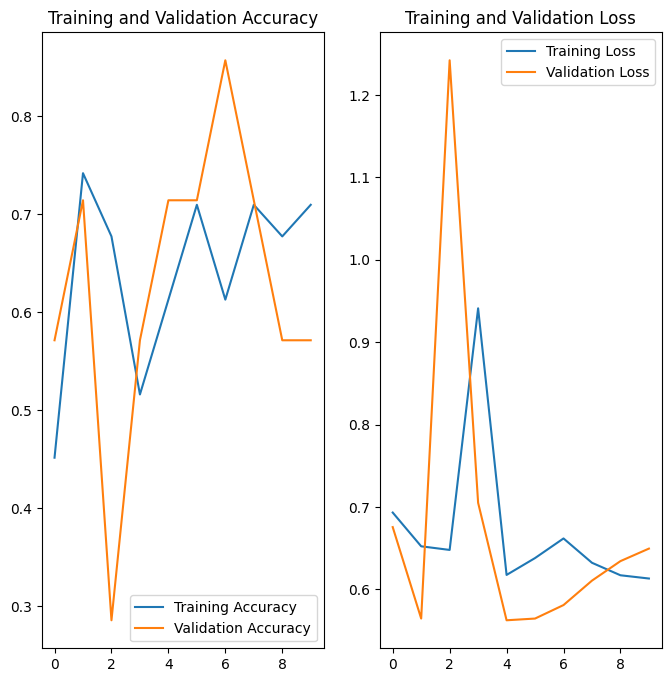

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## RESNet Model

ResNet model wants the input shape (224,224)

In [37]:
batch_size = 32
img_height = 224
img_width = 224


In [38]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/jpg_image_files",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 38 files belonging to 2 classes.
Using 31 files for training.


In [39]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/jpg_image_files",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 38 files belonging to 2 classes.
Using 7 files for validation.


In [40]:
class_names = train_ds.class_names
print(class_names)

['with_contrails', 'without_contrails']


In [7]:
res_model = tf.keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    classifier_activation="softmax",
)
res_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Some transfer learning. We are freezing the layers 0-170.

In [11]:
len(res_model.layers)

192

In [42]:
for layer in res_model.layers[:170]:
    layer.trainable = False

In [43]:
epochs=10
history_res_model = res_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 16s 16s/step - loss: 7.5354 - accuracy: 0.0000e+00 - val_loss: 20.5027 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 11s 11s/step - loss: 4.7247 - accuracy: 0.2258 - val_loss: 11.8645 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 9s 9s/step - loss: 1.7990 - accuracy: 0.9355 - val_loss: 11.9384 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 9s 9s/step - loss: 1.3372 - accuracy: 0.9032 - val_loss: 13.7430 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 10s 10s/step - loss: 0.7882 - accuracy: 1.0000 - val_loss: 5.7562 - val_accuracy: 0.4286
Epoch 6/10
1/1 [==============================] - 10s 10s/step - loss: 0.4682 - accuracy: 0.9355 - val_loss: 5.6363 - val_accuracy: 0.7143
Epoch 7/10
1/1 [==============================] - 10s 10s/step - loss: 0.1320 - accuracy: 1.0000 - val_loss: 6.6088 - val_accuracy: 0.7143
Epoch 8

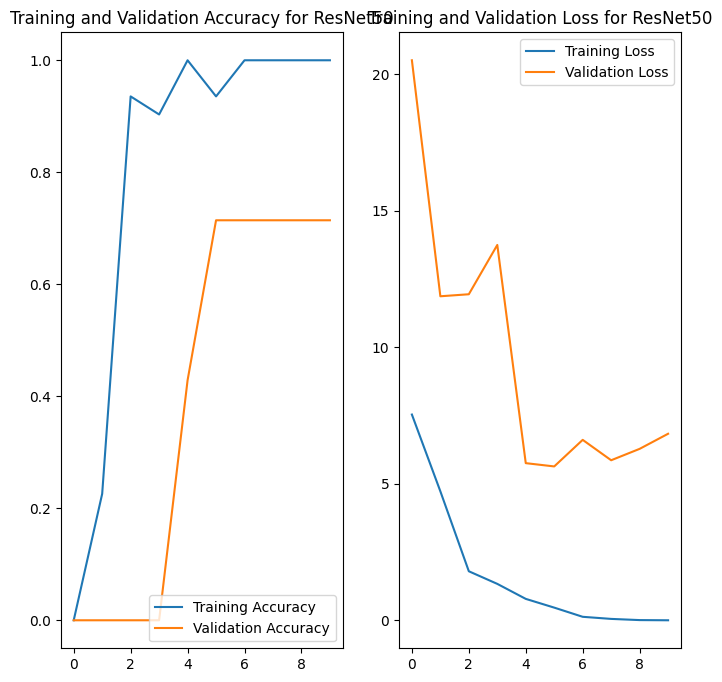

In [46]:
acc = history_res_model.history['accuracy']
val_acc = history_res_model.history['val_accuracy']

loss = history_res_model.history['loss']
val_loss = history_res_model.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for ResNet50')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for ResNet50')
plt.show()


### RESNet Model but with a different type of optimizer function

In [56]:
res_model_newLoss = tf.keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    classifier_activation="softmax",
)

In [66]:
res_model_newLoss.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
     optimizer=keras.optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [67]:
for layer in res_model_newLoss.layers[:170]:
    layer.trainable = False

In [68]:
epochs=10
history_res_model_newLoss = res_model_newLoss.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 9s 9s/step - loss: 7.0927 - accuracy: 0.0000e+00 - val_loss: 70.7234 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 7.0285 - accuracy: 0.0000e+00 - val_loss: 52.7534 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 6.9815 - accuracy: 0.0000e+00 - val_loss: 43.5578 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 6.9416 - accuracy: 0.0000e+00 - val_loss: 37.6309 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 6.9054 - accuracy: 0.0000e+00 - val_loss: 33.3672 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 6.8718 - accuracy: 0.0000e+00 - val_loss: 30.0878 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 6.8398 - accuracy: 0.0000e+00 - val_loss: 27.4537 - val

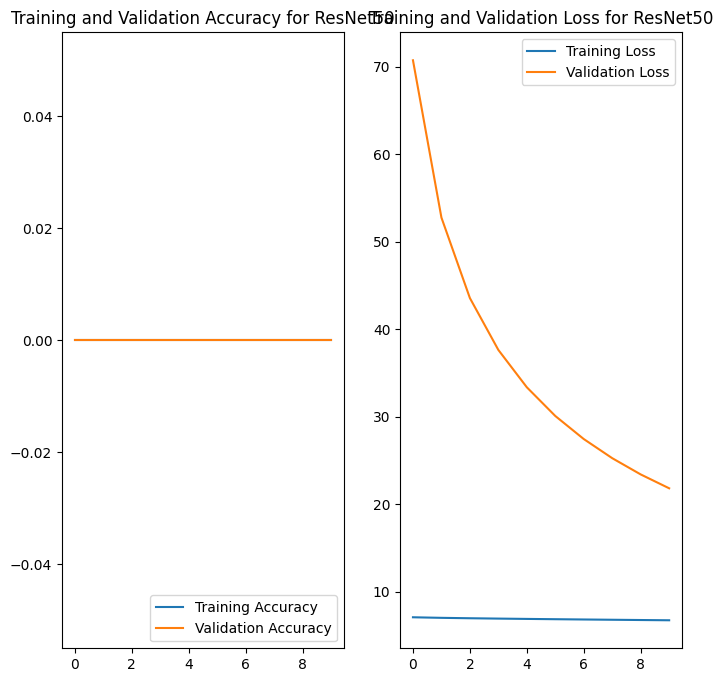

In [69]:
acc = history_res_model_newLoss.history['accuracy']
val_acc = history_res_model_newLoss.history['val_accuracy']

loss = history_res_model_newLoss.history['loss']
val_loss = history_res_model_newLoss.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for ResNet50')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for ResNet50')
plt.show()


In [51]:
# import glob
# import tensorflow as tf
# import numpy as np
# from PIL import Image
# YES_path = glob.glob('data/tif_image_files/with_contrails/*.*')
# YES_path = [i.replace("\\","/") for i in YES_path]
# NO_path = glob.glob('data/tif_image_files/without_contrails/*.*')
# NO_path = [i.replace("\\","/") for i in NO_path]


# data = []
# labels = []

# for i in YES_path[:2]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',target_size= (280,280) )
#     image=np.array(image)
#     data.append(image)
#     labels.append(1)
# for i in NO_path[:2]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',target_size= (280,280))
#     image=np.array(image)
#     data.append(image)
#     labels.append(0)

# data = np.array(data)
# labels = np.array(labels)